# Bagging and Random Forest Classifier on MNIST dataset

In [4]:
from keras.datasets import mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

## Loading the MNIST dataset

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# reshaping the data 
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [9]:
pd.DataFrame(X_train[0]).max()

0    255
dtype: uint8

The maximum value of a pixel is 255. The row feature vectors can be normalized by dividing each of them by 255.

In [10]:
# normalizing the data
X_train = X_train/255
X_test = X_test/255

In [11]:
# Shuffle Split cross validation with 10 splits and 20% data set aside for model evaluation as a test data
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [12]:
def train_classifiers(estimator, X_train, y_train, cv, name):
  estimator.fit(X_train, y_train)
  cv_train_score = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='f1_macro')

  print(f'On an average {name} model has an average score of {cv_train_score.mean():.3f} +- {cv_train_score.std():.3f} on the training set')

In [13]:
def eval(estimator, X_test, y_test):
  y_pred = estimator.predict(X_test)

  print (f'# Classification report: ')
  print(classification_report(y_test, y_pred))
  
  print(f'# Confusion matrix display: ')
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
  disp.plot()
  plt.title('Condusion Matrix')
  plt.show

## Decison Tree for MNIST classification

The `train_classifiers` function will print the mean of cross validated accuracy and standard deviation of the classifier on the training dataset. 

In [80]:
decision_tree_pipeline = Pipeline( [ ('classifier', DecisionTreeClassifier()) ])
train_classifiers(decision_tree_pipeline, X_train, y_train, cv, 'decision tree')

On an average decision tree model has an average score of 0.867 +- 0.004 on the training set


# classification report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.82      0.83      0.83       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.80      0.81       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion matrix display: 


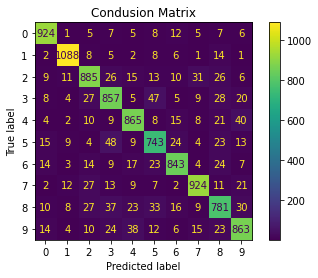

In [79]:
eval(decision_tree_pipeline, X_test, y_test)

We got the accuracy of $0.88$ with Decison Tree Classifier

# MNIST Classification with Bagging



In [2]:
from sklearn.ensemble import BaggingClassifier

In [15]:
bagging_pipeline = Pipeline( [ ('bagging', BaggingClassifier()) ])

train_classifiers(bagging_pipeline, X_train, y_train, cv, 'bagging')

On an average bagging model has an average score of 0.938 +- 0.004 on the training set


# classification report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.94      0.93      0.93      1010
           4       0.95      0.95      0.95       982
           5       0.93      0.91      0.92       892
           6       0.97      0.95      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.92      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

# Confusion matrix display: 


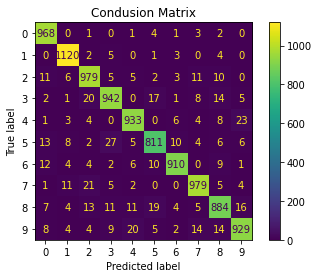

In [16]:
eval(bagging_pipeline, X_test, y_test)

We got the accuracy of  $0.95$  with Bagging Classifier

# Random Forest for MNIST multi-class Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
random_forest_pipeline = Pipeline( [ ('classifier', RandomForestClassifier()) ])

train_classifiers(random_forest_pipeline, X_train, y_train, cv, 'random_forest')

On an average random_forest model has an average score of 0.967 +- 0.002 on the training set


# classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

# Confusion matrix display: 


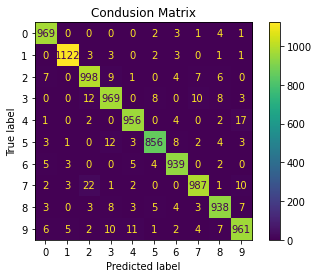

In [19]:
eval(random_forest_pipeline, X_test, y_test)

The accuracy jumped by 2 percentage points to $0.97$ with Random Forest Classifier 